In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SyntheticDataModule import *
from estimators import *
from utils import *

,S,d,n,True mean Y0,Impute mean Y0,Drop mean Y0,Oracle-IPCW mean Y0,True mean Y1,Impute mean Y1,Drop mean Y1,Oracle-IPCW mean Y1,True ATE,Impute ATE,Drop ATE,Oracle-IPCW ATE
0,0,1,1000,1.833301,1.818913,1.820230,1.912654,6.041121,5.82952,5.858611,5.949549,4.207820,4.010607,4.038381,4.036895
1,1,1,4000,2.008564,2.044792,2.039085,2.049147,6.253094,3.87838,5.528025,6.393470,4.244529,1.833588,3.488940,4.344323


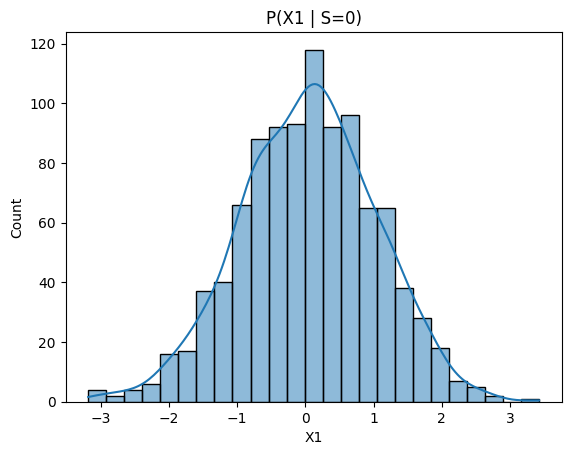

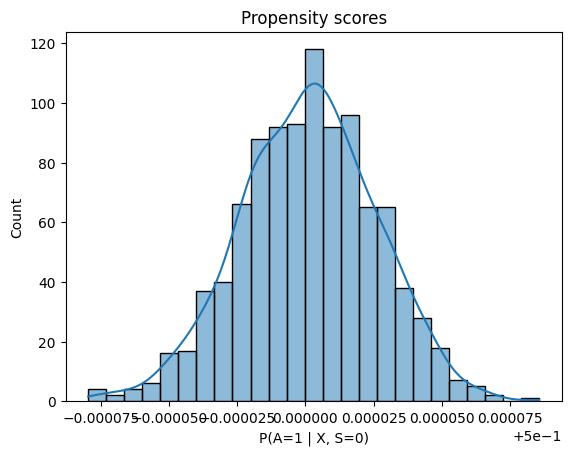

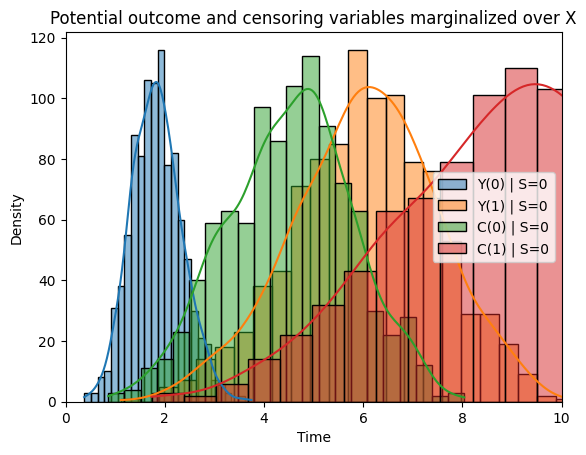

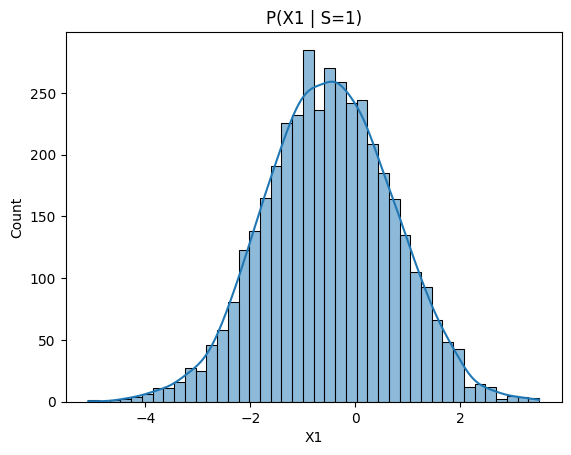

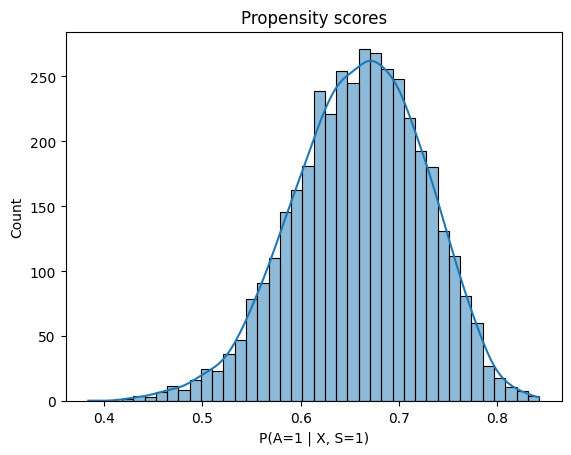

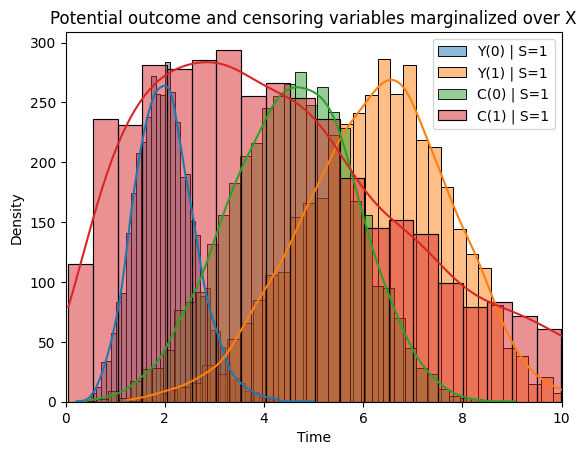

In [2]:
save_df = True
d = 1
rct_size = 1000
m = 4
obs_size = rct_size * m

# RCT data generating model parameters

px_dist_r, px_args_r = 'Gaussian', {'mean': [0], 'cov': [[1]]}
prop_fn_r, prop_args_r = 'sigmoid', {'beta': [0, 1e-4]}
tte_params_r = {'model': 'coxph',
                'hazard': 'weibull',
                'cox_args': {'Y0': {'beta': [0,0.75], 'lambda': 0.5, 'p': 5},
                            'Y1': {'beta': [0,0.25], 'lambda': 0.15, 'p': 5},
                            'C0': {'beta': [0,0], 'lambda': 0.2, 'p': 4},
                            'C1': {'beta': [0,0], 'lambda': 0.1, 'p': 4},},
                }

# OBS data generating model parameters

px_dist_o, px_args_o = 'Gaussian', {'mean': [-0.5], 'cov': [[1.5]]}
prop_fn_o, prop_args_o = 'sigmoid', {'beta': [0.8, 0.25]}
tte_params_o = {'model': 'coxph',
                'hazard': 'weibull',
                'cox_args': {'Y0': {'beta': [0,0.75], 'lambda': 0.5, 'p': 5},
                            'Y1': {'beta': [0,0.25], 'lambda': 0.15, 'p': 5},
                            'C0': {'beta': [0,0], 'lambda': 0.2, 'p': 4},
                            'C1': {'beta': [0,0], 'lambda': 0.2, 'p': 1.5},},
                }


RCTData = SyntheticDataModule(save_df, d, rct_size, 0, px_dist_r, px_args_r, prop_fn_r, prop_args_r, tte_params_r)
OBSData = SyntheticDataModule(save_df, d, obs_size, 1, px_dist_o, px_args_o, prop_fn_o, prop_args_o, tte_params_o)

df_rct_oracle, df_rct = RCTData.get_df()
df_obs_oracle, df_obs = OBSData.get_df()
df_combined = pd.concat([df_rct, df_obs], axis=0, ignore_index=True)  # merge the dataframes into one

summary_df = pd.concat([RCTData.summary(plot=True), OBSData.summary(plot=True)], axis=0, ignore_index=True)
summary_df

In [ ]:
# x_space = np.linspace(-10,10,401)
# cov_name = 'X1'
# obs_oracle_prop = OBSData.calc_oracle_prop(x_space, cov_name)
# plt.figure()
# plt.plot(x_space, obs_oracle_prop)
# plt.xlabel(cov_name)
# plt.ylabel(f'P(A=1|{cov_name},S=1)')
# plt.title(f'Oracle propensity score in study S=1 wrt covariate {cov_name}')
# plt.show()

# t = np.linspace(0,10,101)
# cov_vals = [0, 0]
# tbs_Y0 = RCTData.get_oracle_surv_curve(t, cov_vals, 'Y0')
# tbs_Y1 = RCTData.get_oracle_surv_curve(t, cov_vals, 'Y1')
# tbs_C0 = RCTData.get_oracle_surv_curve(t, cov_vals, 'C0')
# tbs_C1 = RCTData.get_oracle_surv_curve(t, cov_vals, 'C1')
# plt.figure()
# plt.plot(t, tbs_Y0, label='Y0')
# plt.plot(t, tbs_Y1, label='Y1')
# plt.plot(t, tbs_C0, label='C0')
# plt.plot(t, tbs_C1, label='C1')
# plt.xlabel('t')
# plt.ylabel(r'$S(t)$')
# plt.title(f'True survival curves in study S=0 with X={cov_vals}')
# plt.legend()
# plt.show()

In [ ]:
a = np.load('results/sce1/pvals.npy')